# Import Libraries

In [221]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression

import statsmodels.formula.api as smf
from scipy.stats import boxcox

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

from mlxtend.evaluate import bias_variance_decomp


# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import the dataset

In [3]:
sales_data = pd.read_csv('./Sales_promotion.csv')
sales_data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Exploratory Data Analysis

In [4]:
display(sales_data.isnull().any())

Unnamed: 0    False
TV            False
Radio         False
Newspaper     False
Sales         False
dtype: bool

In [5]:
# There are no null values

In [6]:
sales_data.shape

(200, 5)

In [7]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
Radio         200 non-null float64
Newspaper     200 non-null float64
Sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
# Re arrange the order of Sales feature

In [9]:
salescolumn = sales_data['Sales']

In [10]:
sales_data.drop(labels=['Sales'], axis=1,inplace = True)
sales_data.insert(0, 'Sales', salescolumn)

In [11]:
sales_data.head()

,Sales,Unnamed: 0,TV,Radio,Newspaper
0,22.1,1,230.1,37.8,69.2
1,10.4,2,44.5,39.3,45.1
2,9.3,3,17.2,45.9,69.3
3,18.5,4,151.5,41.3,58.5
4,12.9,5,180.8,10.8,58.4


In [12]:
sales_data = sales_data.drop('Unnamed: 0', axis = 1)

In [13]:
sales_data.head()

,Sales,TV,Radio,Newspaper
0,22.1,230.1,37.8,69.2
1,10.4,44.5,39.3,45.1
2,9.3,17.2,45.9,69.3
3,18.5,151.5,41.3,58.5
4,12.9,180.8,10.8,58.4


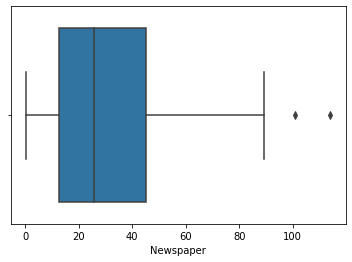

In [14]:
sns.boxplot(sales_data["Newspaper"])

In [15]:
# Median of Marketing Spend for News Paper is 25 

In [16]:
# No treatment required for outlinears

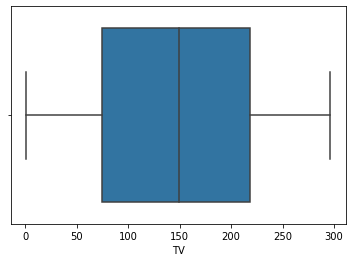

In [17]:
sns.boxplot(sales_data["TV"])

In [18]:
# Median of Marketing Spend for TV is 150

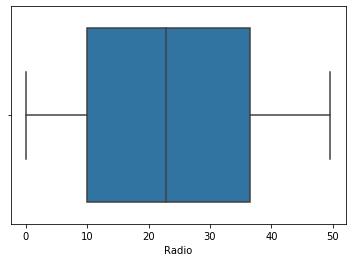

In [19]:
sns.boxplot(sales_data["Radio"])

In [20]:
# Median of Marketing Spend for Radio is 25

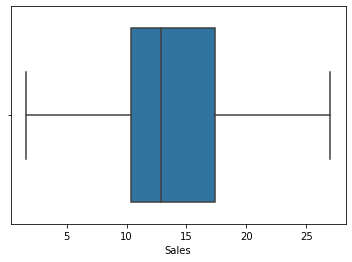

In [21]:
sns.boxplot(sales_data["Sales"])

In [22]:
# Median of Sales is 14

In [23]:
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

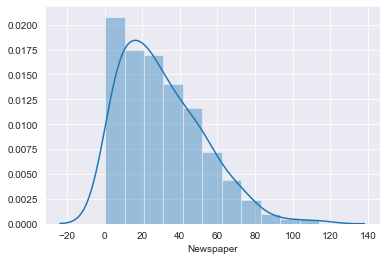

In [24]:
sns.distplot(sales_data["Newspaper"])

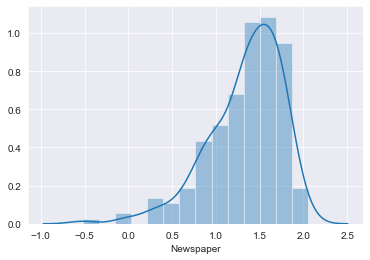

In [25]:
sns.distplot(np.log10(sales_data["Newspaper"]))

In [26]:
# Newspaper is left skewed

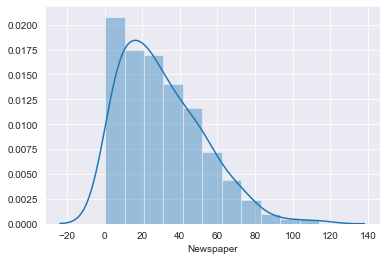

In [27]:
sns.distplot(sales_data["Newspaper"])

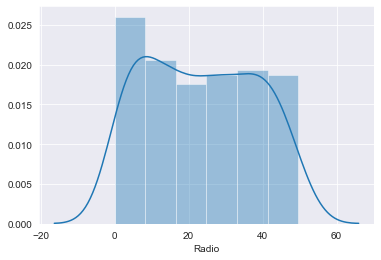

In [28]:
sns.distplot(sales_data["Radio"])

In [29]:
# PCA 

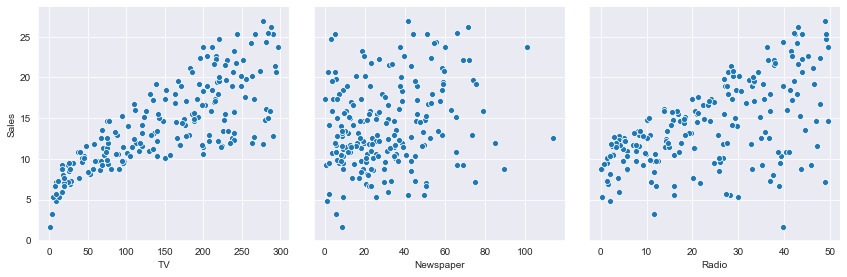

In [31]:
sns.pairplot(sales_data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

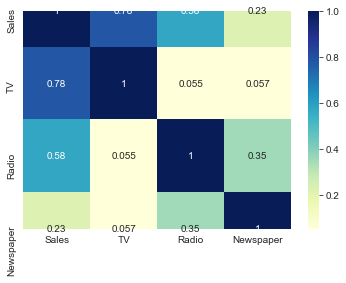

In [32]:
sns.heatmap(sales_data.corr(), cmap="YlGnBu", annot = True, annot_kws={'size':10})
plt.show()

In [30]:
# High correlation between Marketing Spend in TV and Sales : 0.7
# Others are have low correlation

# Logistics Regression without Normalization Regularization

In [71]:
X01 = sales_data.drop('Sales', axis = 1)
y01 = sales_data['Sales']

In [72]:
X01_train, X01_test, y01_train, y01_test = train_test_split(X01, y01, test_size = 0.2, random_state = 42)

In [73]:
LR01 = LinearRegression(normalize = True)
LR01.fit(X01_train, y01_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [74]:
y01_predict_train = LR01.predict(X01_train)
y01_predict_test = LR01.predict(X01_test)

In [75]:
print(LR01.coef_)
print(LR01.intercept_)

[0.04472952 0.18919505 0.00276111]
2.9790673381226327


In [76]:
print("Train R2 Score:",r2_score(y01_train, y01_predict_train))
print("Train Mean Squarred Error:", mean_squared_error(y01_train, y01_predict_train))
print("Train RMSE:", math.sqrt(mean_squared_error(y01_train, y01_predict_train)))
print("Train Mean Absolute Error : " + str(mean_absolute_error(y01_train,y01_predict_train)))

Train R2 Score: 0.8957008271017818
Train Mean Squarred Error: 2.705129423081414
Train RMSE: 1.644727765644337
Train Mean Absolute Error : 1.1984678961500133


In [77]:
print("Test R2 Score:", r2_score(y01_test, y01_predict_test))
print("Test Mean Squarred Error:", mean_squared_error(y01_test, y01_predict_test))
print("Test RMSE:", math.sqrt(mean_squared_error(y01_test, y01_predict_test)))
print("Test Mean Absolute Error : " + str(mean_absolute_error(y01_test, y01_predict_test)))

Test R2 Score: 0.8994380241009119
Test Mean Squarred Error: 3.1740973539761064
Test RMSE: 1.7815996615334508
Test Mean Absolute Error : 1.4607567168117606


In [78]:
mse, bias, var = bias_variance_decomp(LR01, X01_train.values, y01_train.values, X01_test.values, y01_test.values, loss='mse', num_rounds=200, random_seed=1)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 3.304
Bias: 3.167
Variance: 0.137


In [54]:
LR01.score(X01, y01)

0.8966643473004003

In [58]:
LR01 = smf.ols(formula='Sales ~ TV + Radio + Newspaper',data=sales_data).fit()

In [60]:
LR01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 27 Aug 2022   Prob (F-statistic):           1.58e-96
Time:                        16:16:56   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
# p values of TV , Radio are less than 0.05 We can reject the null hypothesis .
# p values of Newspaper are more than 0.05 We can accept alternative hypothesis.

In [68]:
# There is no point in spending money on Newspaper

In [69]:
# Sales = 0.045*TV + 0.19*Radio + 2.98

# Data Preprocessing

In [79]:
# Newspaper is left skewed . Time to Normalize it 

In [80]:
sales_data_encode = sales_data.copy()

In [81]:
sales_data.head()

,Sales,TV,Radio,Newspaper
0,22.1,230.1,37.8,69.2
1,10.4,44.5,39.3,45.1
2,9.3,17.2,45.9,69.3
3,18.5,151.5,41.3,58.5
4,12.9,180.8,10.8,58.4


In [73]:
sales_data_encode.head()

,Sales,TV,Radio,Newspaper
0,22.1,230.1,37.8,69.2
1,10.4,44.5,39.3,45.1
2,9.3,17.2,45.9,69.3
3,18.5,151.5,41.3,58.5
4,12.9,180.8,10.8,58.4


In [82]:
y_bc,lam, ci= boxcox(sales_data_encode['Newspaper'],alpha=0.05)
ci,lam

((0.2859372081845798, 0.5608227307182987), 0.419642754215746)

In [83]:
## Log transform
sales_data_encode['Newspaper'] = np.log(sales_data_encode['Newspaper'])

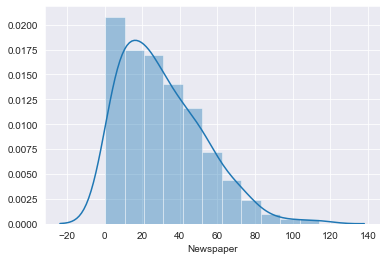

In [86]:
sns.distplot(sales_data["Newspaper"])

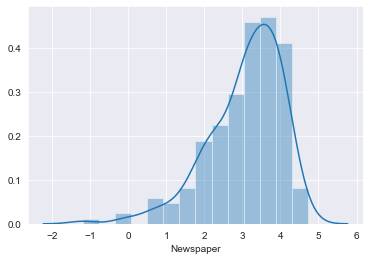

In [87]:
sns.distplot(sales_data_encode["Newspaper"])

In [127]:
# Newspaper data is normalized

In [ ]:
# Logarithmic transformations are used to "normalize" skewed or kurtotic distributions of continuous variables so that parametric statistics can be conducted. 
# Essentially, all that researchers are doing with a logarithmic transformation is taking the natural log (ln) of each observation in the distribution.

# Linear Regression with Normalization

In [167]:
X02 = sales_data_encode.drop('Sales', axis = 1)
y02 = sales_data['Sales']

In [168]:
X02_train, X02_test, y02_train, y02_test = train_test_split(X02, y02, test_size = 0.2, random_state = 42)

In [169]:
LR02 = LinearRegression(normalize = True)
LR02.fit(X02_train, y02_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [170]:
y02_predict_train = LR01.predict(X02_train)
y02_predict_test = LR01.predict(X02_test)

In [171]:
print(LR02.coef_)
print(LR02.intercept_)

[0.04479304 0.18902955 0.09467847]
2.764298216745667


In [172]:
print("Train R2 Score:",r2_score(y02_train, y02_predict_train))
print("Train Mean Squarred Error:", mean_squared_error(y02_train, y02_predict_train))
print("Train RMSE:", math.sqrt(mean_squared_error(y02_train, y02_predict_train)))
print("Train Mean Absolute Error : " + str(mean_absolute_error(y02_train,y02_predict_train)))

Train R2 Score: 0.8931368177881048
Train Mean Squarred Error: 2.7716302096432655
Train RMSE: 1.6648213746955753
Train Mean Absolute Error : 1.2661866322052844


In [173]:
print("Test R2 Score:", r2_score(y02_test, y02_predict_test))
print("Test Mean Squarred Error:", mean_squared_error(y02_test, y02_predict_test))
print("Test RMSE:", math.sqrt(mean_squared_error(y02_test, y02_predict_test)))
print("Test Mean Absolute Error : " + str(mean_absolute_error(y02_test, y02_predict_test)))

Test R2 Score: 0.8976119957180012
Test Mean Squarred Error: 3.23173337203027
Test RMSE: 1.797702247879295
Test Mean Absolute Error : 1.5212994484408433


In [174]:
mse, bias, var = bias_variance_decomp(LR02, X02_train.values, y02_train.values, X02_test.values, y02_test.values, loss='mse', num_rounds=200, random_seed=1)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 3.286
Bias: 3.155
Variance: 0.131


In [175]:
LR02.score(X02, y02)

0.8931325919559143

In [176]:
LR02 = smf.ols(formula='Sales ~ TV + Radio + Newspaper',data=sales_data).fit()

In [177]:
# Sales = 0.045*TV + 0.19*Radio + 0.09*Newspaper + 2.76

In [178]:
LR02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 27 Aug 2022   Prob (F-statistic):           1.58e-96
Time:                        17:44:08   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [179]:
# p values of TV , Radio are less than 0.05 We can reject the null hypothesis .
# p values of Newspaper are more than 0.05 We can accept alternative hypothesis.

In [180]:
# There is no point in spending money on Newspaper

In [181]:
# Sales = 0.045*TV + 0.19*Radio + 2.76

In [ ]:
# Regularization favors simpler models to more complex models to prevent your model from overfitting to the data.  
# They address the following concerns within a model: variance-bias tradeoff, multicollinearity, sparse data handling(i.e. the situation where there are more observations than features), feature selection, and an easier interpretation of the output.

# Linear Regression with Regularization

In [873]:
X03 = sales_data_encode.drop('Sales', axis = 1)
y03 = sales_data['Sales']

In [874]:
X03 = X03.drop('Newspaper', axis = 1)

In [875]:
X03.head()

,TV,Radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8


In [879]:
scaler = StandardScaler()
X03 = scaler.fit_transform(X03)
X03 = pd.DataFrame(data = X03, columns = ['TV','Radio'])

In [880]:
X03.head()

,TV,Radio
0,0.969852,0.981522
1,-1.197376,1.082808
2,-1.516155,1.528463
3,0.052050,1.217855
4,0.394182,-0.841614


In [901]:
# sns.distplot(X03["Newspaper"])

In [882]:
sales_data_std = pd.DataFrame()

In [883]:
sales_data_std = sales_data_std.append(X03)
sales_data_std.insert(0, 'Sales', salescolumn)

In [884]:
X03_train, X03_test, y03_train, y03_test = train_test_split(X03, y03, test_size = 0.2, random_state = 42)

In [885]:
LR03 = LinearRegression(normalize = True)
LR03.fit(X03_train, y03_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [886]:
y03_predict_train = LR03.predict(X03_train)
y03_predict_test = LR03.predict(X03_test)

In [888]:
print(LR03.coef_)
print(LR03.intercept_)

[3.83050189 2.82371462]
14.040899834949846


In [889]:
# Sales = 3.84*TV + 2.8*Radio + 14

In [890]:
print("Train R2 Score:",r2_score(y03_train, y03_predict_train))
print("Train Mean Squarred Error:", mean_squared_error(y03_train, y03_predict_train))
print("Train RMSE:", math.sqrt(mean_squared_error(y03_train, y03_predict_train)))
print("Train Mean Absolute Error : " + str(mean_absolute_error(y03_train,y03_predict_train)))

Train R2 Score: 0.8955982149747163
Train Mean Squarred Error: 2.707790796862015
Train RMSE: 1.6455366288424014
Train Mean Absolute Error : 1.1965003043815412


In [891]:
print("Test R2 Score:", r2_score(y03_test, y03_predict_test))
print("Test Mean Squarred Error:", mean_squared_error(y03_test, y03_predict_test))
print("Test RMSE:", math.sqrt(mean_squared_error(y03_test, y03_predict_test)))
print("Test Mean Absolute Error : " + str(mean_absolute_error(y03_test, y03_predict_test)))

Test R2 Score: 0.9005833101920355
Test Mean Squarred Error: 3.1379480090683542
Test RMSE: 1.771425417303352
Test Mean Absolute Error : 1.4443023138227578


In [896]:
mse, bias, var = bias_variance_decomp(LR03, X03_train.values, y03_train.values, X03_test.values, y03_test.values, loss='mse', num_rounds=200, random_seed=1)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 3.216
Bias: 3.122
Variance: 0.094


In [897]:
LR03.score(X03, y03)

0.8948829415415336

In [898]:
LR03 = smf.ols(formula='Sales ~ TV + Radio',data=sales_data_std).fit()

In [899]:
LR03.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 28 Aug 2022   Prob (F-statistic):           4.83e-98
Time:                        16:44:19   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.0225      0.119    117.945      0.000      13.788      14.257
TV             3.9184      0.119     32.909      0.000       3.684       4.153
Radio          2.7841      0.119     23.382      0.000       2.549       3.019
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         1.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Ridge with Regularization

In [ ]:
# Ridge assigns a penalty that is the squared magnitude of the coefficients to the loss function multiplied by lambda. 

In [ ]:
# ||y - Xw||^2_2 + alpha * ||w||^2_

In [790]:
X04 = sales_data_encode.drop('Sales', axis = 1)
y04 = sales_data['Sales']

In [791]:
scaler = StandardScaler()
Z1 = scaler.fit_transform(X04)
X04 = pd.DataFrame(data = Z1, columns = X04.columns)

In [792]:
X04_train, X04_test, y04_train, y04_test = train_test_split(X04, y04, test_size = 0.2, random_state = 42)

In [793]:
LR04 = Ridge()
LR04.fit(X04_train, y04_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [794]:
y04_predict_train = LR04.predict(X04_train)
y04_predict_test = LR04.predict(X04_test)

In [796]:
print("Train R2 Score:",r2_score(y04_train, y04_predict_train))
print("Train Mean Squarred Error:", mean_squared_error(y04_train, y04_predict_train))
print("Train RMSE:", math.sqrt(mean_squared_error(y04_train, y04_predict_train)))
print("Train Mean Absolute Error : " + str(mean_absolute_error(y04_train,y04_predict_train)))

Train R2 Score: 0.8958439518606509
Train Mean Squarred Error: 2.701417303554192
Train RMSE: 1.6435988876712566
Train Mean Absolute Error : 1.1992263796690656


In [797]:
print("Test R2 Score:", r2_score(y04_test, y04_predict_test))
print("Test Mean Squarred Error:", mean_squared_error(y04_test, y04_predict_test))
print("Test RMSE:", math.sqrt(mean_squared_error(y04_test, y04_predict_test)))
print("Test Mean Absolute Error : " + str(mean_absolute_error(y04_test, y04_predict_test)))

Test R2 Score: 0.8991463205645537
Test Mean Squarred Error: 3.183304565893157
Test RMSE: 1.7841817636925776
Test Mean Absolute Error : 1.4680558792975051


In [798]:
mse, bias, var = bias_variance_decomp(LR04, X04_train.values, y04_train.values, X04_test.values, y04_test.values, loss='mse', num_rounds=200, random_seed=1)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 3.300
Bias: 3.171
Variance: 0.130


In [799]:
LR04.score(X04, y04)

0.8929649832644385

In [ ]:
# Hyperparameter tuning

In [ ]:
# alpha : Constant that multiplies the L2 term.
# Normalize : If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm.

In [800]:
LR04_gbr_parameters = {
    'alpha':[0.001,0.005,0.01,0.1,0.5,1],
    'normalize':[True,False],
}

In [801]:
LR04_grid_search = GridSearchCV(LR04, LR04_gbr_parameters, cv=5, verbose=1)
LR04_grid_search.fit(X04_train, y04_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.005, 0.01, 0.1, 0.5, 1],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [802]:
print(LR04_grid_search.best_score_)
print(LR04_grid_search.best_params_)

0.8608955236901966
{'alpha': 0.01, 'normalize': True}


In [803]:
LR04_grid_search_opt = Ridge(alpha=0.01,normalize=True)
LR04_grid_search_opt.fit(X04_train, y04_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [804]:
y07_predict_train = LR04_grid_search_opt.predict(X04_train)
y07_predict_test = LR04_grid_search_opt.predict(X04_test)

In [805]:
print("Train R2 Score:",r2_score(y04_train, y04_predict_train))
print("Train Mean Squarred Error:", mean_squared_error(y04_train, y04_predict_train))
print("Train RMSE:", math.sqrt(mean_squared_error(y04_train, y04_predict_train)))
print("Train Mean Absolute Error : " + str(mean_absolute_error(y04_train,y04_predict_train)))

Train R2 Score: 0.8958439518606509
Train Mean Squarred Error: 2.701417303554192
Train RMSE: 1.6435988876712566
Train Mean Absolute Error : 1.1992263796690656


In [806]:
print("Test R2 Score:", r2_score(y04_test, y04_predict_test))
print("Test Mean Squarred Error:", mean_squared_error(y04_test, y04_predict_test))
print("Test RMSE:", math.sqrt(mean_squared_error(y04_test, y04_predict_test)))
print("Test Mean Absolute Error : " + str(mean_absolute_error(y04_test, y04_predict_test)))

Test R2 Score: 0.8991463205645537
Test Mean Squarred Error: 3.183304565893157
Test RMSE: 1.7841817636925776
Test Mean Absolute Error : 1.4680558792975051


In [807]:
mse, bias, var = bias_variance_decomp(LR04_grid_search_opt, X04_train.values, y04_train.values, X04_test.values, y04_test.values, loss='mse', num_rounds=200, random_seed=1)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 3.308
Bias: 3.180
Variance: 0.129


In [808]:
print(LR04_grid_search_opt.coef_)
print(LR04_grid_search_opt.intercept_)

[3.72812562 2.82350682 0.28511788]
14.147721014814078


In [809]:
LR04_grid_search_opt.score(X04, y04)

0.892901607339037

In [810]:
LR04_grid_search_opt = smf.ols(formula='Sales ~ TV + Radio + Newspaper',data=sales_data_std).fit()

In [691]:
LR04_grid_search_opt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.5
Date:                Sat, 27 Aug 2022   Prob (F-statistic):           1.53e-96
Time:                        23:00:32   Log-Likelihood:                -386.15
No. Observations:                 200   AIC:                             780.3
Df Residuals:                     196   BIC:                             793.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.0225      0.119    117.674      0.000      13.787      14.258
TV             3.9180      0.119     32.827      0.000       3.683       4.153
Radio          2.7752      0.123     22.595      0.000       2.533       3.017
Newspaper      0.0378      0.123      0.308      0.758      -0.204       0.280
==============================================================================
Omnibus:                       59.415   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.002
Skew:                          -1.317   Prob(JB):                     3.26e-32
Kurtosis:                       6.235   Cond. No.                         1.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Regularization favors simpler models to more complex models to prevent your model from overfitting to the data. 
# They address the following concerns within a model: variance-bias tradeoff, multicollinearity, sparse data handling, feature selection, and an easier interpretation of the output.

# Lasso with Regularization

In [854]:
# Lasso stands for Least Absolute Shrinkage Selector Operator. 
# Lasso assigns a penalty to the coefficients in the linear model using the formula below and eliminates variables with coefficients that zero.
# Lasso does not work well with multicollinearity. 

In [771]:
X05 = sales_data_encode.drop('Sales', axis = 1)
y05 = sales_data['Sales']

In [772]:
scaler = StandardScaler()
Z2 = scaler.fit_transform(X05)
X05 = pd.DataFrame(data = Z2, columns = X05.columns)

In [773]:
X05_train, X05_test, y05_train, y05_test = train_test_split(X05, y05, test_size = 0.2, random_state = 42)

In [774]:
LR05 = Lasso()
LR05.fit(X05_train, y05_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [775]:
y05_predict_train = LR05.predict(X05_train)
y05_predict_test = LR05.predict(X05_test)

In [776]:
print("Train R2 Score:",r2_score(y05_train, y05_predict_train))
print("Train Mean Squarred Error:", mean_squared_error(y05_train, y05_predict_train))
print("Train RMSE:", math.sqrt(mean_squared_error(y05_train, y05_predict_train)))
print("Train Mean Absolute Error : " + str(mean_absolute_error(y05_train,y05_predict_train)))

Train R2 Score: 0.8208730845171388
Train Mean Squarred Error: 4.645880461692358
Train RMSE: 2.155430458560971
Train Mean Absolute Error : 1.5513504932168036


In [777]:
print("Test R2 Score:", r2_score(y05_test, y05_predict_test))
print("Test Mean Squarred Error:", mean_squared_error(y05_test, y05_predict_test))
print("Test RMSE:", math.sqrt(mean_squared_error(y05_test, y05_predict_test)))
print("Test Mean Absolute Error : " + str(mean_absolute_error(y05_test, y05_predict_test)))

Test R2 Score: 0.8160509529396187
Test Mean Squarred Error: 5.806092992113504
Test RMSE: 2.409583572344712
Test Mean Absolute Error : 1.86773669893389


In [778]:
mse, bias, var = bias_variance_decomp(LR05, X05_train.values, y05_train.values, X05_test.values, y05_test.values, loss='mse', num_rounds=200, random_seed=1)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 5.981
Bias: 5.840
Variance: 0.141


In [779]:
LR05.score(X05, y05)

0.8016501426657084

In [ ]:
# Hyperparameter tuning

In [ ]:
# alpha : Constant that multiplies the L1 term, controlling regularization strength.
# Normalize : If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm.

In [780]:
LR05_gbr_parameters = {
    'alpha':[0.001,0.005,0.01,0.1,0.5,1],
    'normalize':[True,False],
}

In [781]:
LR05_grid_search = GridSearchCV(LR05, LR05_gbr_parameters, cv=5, verbose=1)
LR05_grid_search.fit(X05_train, y05_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.005, 0.01, 0.1, 0.5, 1],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [782]:
print(LR05_grid_search.best_score_)
print(LR05_grid_search.best_params_)

0.862245963190974
{'alpha': 0.1, 'normalize': False}


In [783]:
LR05_grid_search_opt = Lasso(alpha=0.1,normalize=True)
LR05_grid_search_opt.fit(X05_train, y05_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [784]:
y05_predict_train = LR05_grid_search_opt.predict(X05_train)
y05_predict_test = LR05_grid_search_opt.predict(X05_test)

In [785]:
print("Train R2 Score:",r2_score(y05_train, y05_predict_train))
print("Train Mean Squarred Error:", mean_squared_error(y05_train, y05_predict_train))
print("Train RMSE:", math.sqrt(mean_squared_error(y05_train, y05_predict_train)))
print("Train Mean Absolute Error : " + str(mean_absolute_error(y05_train,y05_predict_train)))

Train R2 Score: 0.7785258180207822
Train Mean Squarred Error: 5.744209752358488
Train RMSE: 2.396708107458747
Train Mean Absolute Error : 1.7907130667988276


In [786]:
print("Test R2 Score:", r2_score(y05_test, y05_predict_test))
print("Test Mean Squarred Error:", mean_squared_error(y05_test, y05_predict_test))
print("Test RMSE:", math.sqrt(mean_squared_error(y05_test, y05_predict_test)))
print("Test Mean Absolute Error : " + str(mean_absolute_error(y05_test, y05_predict_test)))

Test R2 Score: 0.7737365572766772
Test Mean Squarred Error: 7.141687386595353
Test RMSE: 2.672393568805941
Test Mean Absolute Error : 2.147439527594907


In [787]:
mse, bias, var = bias_variance_decomp(LR05_grid_search_opt, X05_train.values, y05_train.values, X05_test.values, y05_test.values, loss='mse', num_rounds=200, random_seed=1)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 7.336
Bias: 7.187
Variance: 0.149


In [788]:
LR05_grid_search_opt.score(X05, y05)

0.7633048088039178

In [789]:
print(LR05_grid_search_opt.coef_)
print(LR05_grid_search_opt.intercept_)

[2.43664937 1.67602652 0.        ]
14.17416250528029


In [715]:
LR05_grid_search_opt = smf.ols(formula='Sales ~ TV + Radio + Newspaper',data=sales_data_std).fit()

In [716]:
LR05_grid_search_opt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.5
Date:                Sat, 27 Aug 2022   Prob (F-statistic):           1.53e-96
Time:                        23:21:38   Log-Likelihood:                -386.15
No. Observations:                 200   AIC:                             780.3
Df Residuals:                     196   BIC:                             793.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.0225      0.119    117.674      0.000      13.787      14.258
TV             3.9180      0.119     32.827      0.000       3.683       4.153
Radio          2.7752      0.123     22.595      0.000       2.533       3.017
Newspaper      0.0378      0.123      0.308      0.758      -0.204       0.280
==============================================================================
Omnibus:                       59.415   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.002
Skew:                          -1.317   Prob(JB):                     3.26e-32
Kurtosis:                       6.235   Cond. No.                         1.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# ElasticNet with Regularization

In [ ]:
#Elastic Net combines feature elimination from Lasso and feature coefficient reduction from the Ridge model to improve your model’s predictions

In [ ]:
# Elastic Net combines characteristics of both lasso and ridge. 
# Elastic Net reduces the impact of different features while not eliminating all of the features.

In [ ]:
 # L = ∑( Ŷi– Yi)² + λ∑ β² + λ∑ |β|

In [811]:
X06 = sales_data_encode.drop('Sales', axis = 1)
y06 = sales_data['Sales']

In [812]:
scaler = StandardScaler()
Z3 = scaler.fit_transform(X06)
X06 = pd.DataFrame(data = Z3, columns = X06.columns)

In [813]:
X06_train, X06_test, y06_train, y06_test = train_test_split(X06, y06, test_size = 0.2, random_state = 42)

In [814]:
LR06 = ElasticNet()
LR06.fit(X06_train, y06_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [815]:
y06_predict_train = LR06.predict(X06_train)
y06_predict_test = LR06.predict(X06_test)

In [816]:
# Sales = 2.61*TV + 1.6*Radio + 14.05

In [817]:
print("Train R2 Score:",r2_score(y06_train, y06_predict_train))
print("Train Mean Squarred Error:", mean_squared_error(y06_train, y06_predict_train))
print("Train RMSE:", math.sqrt(mean_squared_error(y06_train, y06_predict_train)))
print("Train Mean Absolute Error : " + str(mean_absolute_error(y06_train,y06_predict_train)))

Train R2 Score: 0.734495264200441
Train Mean Squarred Error: 6.886197203881315
Train RMSE: 2.6241564747326547
Train Mean Absolute Error : 1.9827683112013559


In [818]:
print("Test R2 Score:", r2_score(y06_test, y06_predict_test))
print("Test Mean Squarred Error:", mean_squared_error(y06_test, y06_predict_test))
print("Test RMSE:", math.sqrt(mean_squared_error(y06_test, y06_predict_test)))
print("Test Mean Absolute Error : " + str(mean_absolute_error(y06_test, y06_predict_test)))

Test R2 Score: 0.7209816007433749
Test Mean Squarred Error: 8.806823402911414
Test RMSE: 2.9676292563107363
Test Mean Absolute Error : 2.4440793741226337


In [819]:
mse, bias, var = bias_variance_decomp(LR06, X06_train.values, y06_train.values, X06_test.values, y06_test.values, loss='mse', num_rounds=200, random_seed=1)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 8.961
Bias: 8.845
Variance: 0.116


In [832]:
LR06.score(X06, y06)

0.7056229315889331

In [ ]:
# Hyperparameter tuning

In [ ]:
# alpha : Constant that multiplies the penalty terms
# Normalize : If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm.

In [833]:
LR06_gbr_parameters = {
    'alpha':[0.001,0.005,0.01,0.1,0.5,1],
    'normalize':[True,False],
}

In [834]:
LR06_grid_search = GridSearchCV(LR05, LR06_gbr_parameters, cv=5, verbose=1)
LR06_grid_search.fit(X06_train, y06_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.005, 0.01, 0.1, 0.5, 1],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [835]:
print(LR06_grid_search.best_score_)
print(LR06_grid_search.best_params_)

0.862245963190974
{'alpha': 0.1, 'normalize': False}


In [836]:
LR06_grid_search_opt = ElasticNet(alpha=0.1,normalize=False)
LR06_grid_search_opt.fit(X06_train, y06_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [837]:
y06_predict_train = LR06_grid_search_opt.predict(X06_train)
y06_predict_test = LR06_grid_search_opt.predict(X06_test)

In [838]:
print("Train R2 Score:",r2_score(y06_train, y06_predict_train))
print("Train Mean Squarred Error:", mean_squared_error(y06_train, y06_predict_train))
print("Train RMSE:", math.sqrt(mean_squared_error(y06_train, y06_predict_train)))
print("Train Mean Absolute Error : " + str(mean_absolute_error(y06_train,y06_predict_train)))

Train R2 Score: 0.8926287939760534
Train Mean Squarred Error: 2.784806442238584
Train RMSE: 1.668773933832436
Train Mean Absolute Error : 1.2115031961370213


In [839]:
print("Test R2 Score:", r2_score(y06_test, y06_predict_test))
print("Test Mean Squarred Error:", mean_squared_error(y06_test, y06_predict_test))
print("Test RMSE:", math.sqrt(mean_squared_error(y06_test, y06_predict_test)))
print("Test Mean Absolute Error : " + str(mean_absolute_error(y06_test, y06_predict_test)))

Test R2 Score: 0.8928472649165868
Test Mean Squarred Error: 3.3821253993742233
Test RMSE: 1.8390555726715339
Test Mean Absolute Error : 1.5035858942158948


In [840]:
mse, bias, var = bias_variance_decomp(LR06_grid_search_opt, X06_train.values, y06_train.values, X06_test.values, y06_test.values, loss='mse', num_rounds=200, random_seed=1)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 3.488
Bias: 3.374
Variance: 0.114


In [829]:
LR06_grid_search_opt.score(X06, y06)

0.8887962131049026

In [841]:
print(LR06_grid_search_opt.coef_)
print(LR06_grid_search_opt.intercept_)

[3.50731919 2.67635992 0.24346104]
14.154345130260586


In [842]:
LR06_grid_search_opt = smf.ols(formula='Sales ~ TV + Radio + Newspaper',data=sales_data_std).fit()

In [843]:
LR06_grid_search_opt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.5
Date:                Sun, 28 Aug 2022   Prob (F-statistic):           1.53e-96
Time:                        00:22:55   Log-Likelihood:                -386.15
No. Observations:                 200   AIC:                             780.3
Df Residuals:                     196   BIC:                             793.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.0225      0.119    117.674      0.000      13.787      14.258
TV             3.9180      0.119     32.827      0.000       3.683       4.153
Radio          2.7752      0.123     22.595      0.000       2.533       3.017
Newspaper      0.0378      0.123      0.308      0.758      -0.204       0.280
==============================================================================
Omnibus:                       59.415   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.002
Skew:                          -1.317   Prob(JB):                     3.26e-32
Kurtosis:                       6.235   Cond. No.                         1.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# RandomForestRegressor with Regularization

In [853]:
# A random forest is a meta estimator that fits a number of classifying decision trees 
# on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [844]:
X07 = sales_data_encode.drop('Sales', axis = 1)
y07 = sales_data['Sales']

In [845]:
scaler = StandardScaler()
Z4 = scaler.fit_transform(X06)
X07 = pd.DataFrame(data = Z4, columns = X07.columns)

In [846]:
X07_train, X07_test, y07_train, y07_test = train_test_split(X06, y06, test_size = 0.2, random_state = 42)

In [847]:
LR07 = RandomForestRegressor()
LR07.fit(X07_train, y07_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [848]:
y07_predict_train = LR07.predict(X07_train)
y07_predict_test = LR07.predict(X07_test)

In [849]:
print("Train R2 Score:",r2_score(y07_train, y07_predict_train))
print("Train Mean Squarred Error:", mean_squared_error(y07_train, y07_predict_train))
print("Train RMSE:", math.sqrt(mean_squared_error(y07_train, y07_predict_train)))
print("Train Mean Absolute Error : " + str(mean_absolute_error(y07_train,y07_predict_train)))

Train R2 Score: 0.99442602053111
Train Mean Squarred Error: 0.14456812500000002
Train RMSE: 0.3802211527519215
Train Mean Absolute Error : 0.2714374999999999


In [850]:
print("Test R2 Score:", r2_score(y07_test, y07_predict_test))
print("Test Mean Squarred Error:", mean_squared_error(y07_test, y07_predict_test))
print("Test RMSE:", math.sqrt(mean_squared_error(y07_test, y07_predict_test)))
print("Test Mean Absolute Error : " + str(mean_absolute_error(y07_test, y07_predict_test)))

Test R2 Score: 0.9730045790492409
Test Mean Squarred Error: 0.8520724999999999
Test RMSE: 0.9230777323714401
Test Mean Absolute Error : 0.71925


In [851]:
mse, bias, var = bias_variance_decomp(LR07, X07_train.values, y07_train.values, X07_test.values, y07_test.values, loss='mse', num_rounds=200, random_seed=1)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 1.084
Bias: 0.545
Variance: 0.539


In [852]:
LR07.score(X07, y07)

0.9793917049074942

In [ ]:
# Hyperparameter Tuning
# bootstrap : Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
# max_depth : The maximum depth of the tree.
# max_features : The number of features to consider when looking for the best split:
# min_samples_leaf : The minimum number of samples required to be at a leaf node. 
# min_samples_split :  The minimum number of samples required to split an internal node:
# n_estimators : The number of trees in the forest.

In [445]:
LR07_gbr_parameters = {
    'bootstrap': [True,False],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [447]:
LR07_grid_search = GridSearchCV(estimator=LR07, param_grid=LR07_gbr_parameters, cv=5, verbose=True)

In [448]:
LR07_grid_search.fit(X07_train, y07_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2880 out of 2880 | elapsed: 24.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'bootstrap': [True, False],
       

In [432]:
print(LR07_grid_search.best_score_)
print(LR07_grid_search.best_params_)

0.9598677208181577
{'bootstrap': True, 'max_depth': 110, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}


In [449]:
LR07_grid_search_opt = RandomForestRegressor(bootstrap=True,max_depth=110,max_features=3,min_samples_leaf=3,min_samples_split=8,n_estimators=200)
LR07_grid_search_opt.fit(X07_train, y07_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=110,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=8,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [450]:
y07_predict_train = LR07_grid_search_opt.predict(X07_train)
y07_predict_test = LR07_grid_search_opt.predict(X07_test)

In [451]:
print("Train R2 Score:",r2_score(y07_train, y07_predict_train))
print("Train Mean Squarred Error:", mean_squared_error(y07_train, y07_predict_train))
print("Train RMSE:", math.sqrt(mean_squared_error(y07_train, y07_predict_train)))
print("Train Mean Absolute Error : " + str(mean_absolute_error(y07_train,y07_predict_train)))

Train R2 Score: 0.9867798597903293
Train Mean Squarred Error: 0.34288086151306957
Train RMSE: 0.585560297077141
Train Mean Absolute Error : 0.3979977041044344


In [452]:
print("Test R2 Score:", r2_score(y07_test, y07_predict_test))
print("Test Mean Squarred Error:", mean_squared_error(y07_test, y07_predict_test))
print("Test RMSE:", math.sqrt(mean_squared_error(y07_test, y07_predict_test)))
print("Test Mean Absolute Error : " + str(mean_absolute_error(y07_test, y07_predict_test)))

Test R2 Score: 0.9758688711795589
Test Mean Squarred Error: 0.7616651468173179
Test RMSE: 0.8727342933661527
Test Mean Absolute Error : 0.6844799202839646


In [454]:
mse, bias, var = bias_variance_decomp(LR07_grid_search_opt, X07_train.values, y07_train.values, X07_test.values, y07_test.values, loss='mse', num_rounds=200, random_seed=1)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 1.127
Bias: 0.689
Variance: 0.438


In [455]:
LR07_grid_search_opt.score(X07, y07)

0.9778354091356005

In [456]:
LR07_grid_search_opt = smf.ols(formula='Sales ~ TV + Radio + Newspaper',data=sales_data_std).fit()

In [457]:
LR07_grid_search_opt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.5
Date:                Sat, 27 Aug 2022   Prob (F-statistic):           1.53e-96
Time:                        22:16:33   Log-Likelihood:                -386.15
No. Observations:                 200   AIC:                             780.3
Df Residuals:                     196   BIC:                             793.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.0225      0.119    117.674      0.000      13.787      14.258
TV             3.9180      0.119     32.827      0.000       3.683       4.153
Radio          2.7752      0.123     22.595      0.000       2.533       3.017
Newspaper      0.0378      0.123      0.308      0.758      -0.204       0.280
==============================================================================
Omnibus:                       59.415   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.002
Skew:                          -1.317   Prob(JB):                     3.26e-32
Kurtosis:                       6.235   Cond. No.                         1.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# GradientBoostingRegressor with Regularization

In [ ]:
# This example demonstrates Gradient Boosting to produce a predictive model from an ensemble of weak predictive models. 
# Gradient boosting can be used for regression and classification problems

In [384]:
X08 = sales_data_encode.drop('Sales', axis = 1)
y08 = sales_data['Sales']

In [385]:
scaler = StandardScaler()
Z5 = scaler.fit_transform(X08)
X08 = pd.DataFrame(data = Z5, columns = X08.columns)

In [386]:
X08_train, X08_test, y08_train, y08_test = train_test_split(X08, y08, test_size = 0.2, random_state = 42)

In [387]:
LR08 = GradientBoostingRegressor(random_state=0)
LR08.fit(X08_train, y08_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [388]:
y08_predict_train = LR08.predict(X08_train)
y08_predict_test = LR08.predict(X08_test)

In [389]:
print("Train R2 Score:",r2_score(y08_train, y08_predict_train))
print("Train Mean Squarred Error:", mean_squared_error(y08_train, y08_predict_train))
print("Train RMSE:", math.sqrt(mean_squared_error(y08_train, y08_predict_train)))
print("Train Mean Absolute Error : " + str(mean_absolute_error(y08_train,y08_predict_train)))

Train R2 Score: 0.9987329272409667
Train Mean Squarred Error: 0.032863115846475346
Train RMSE: 0.18128186849896308
Train Mean Absolute Error : 0.14623251268350282


In [390]:
print("Test R2 Score:", r2_score(y08_test, y08_predict_test))
print("Test Mean Squarred Error:", mean_squared_error(y08_test, y08_predict_test))
print("Test RMSE:", math.sqrt(mean_squared_error(y08_test, y08_predict_test)))
print("Test Mean Absolute Error : " + str(mean_absolute_error(y08_test, y08_predict_test)))

Test R2 Score: 0.9834980297858188
Test Mean Squarred Error: 0.5208614839150151
Test RMSE: 0.7217073395185996
Test Mean Absolute Error : 0.6096147404479146


In [391]:
mse, bias, var = bias_variance_decomp(LR08, X08_train.values, y08_train.values, X08_test.values, y08_test.values, loss='mse', num_rounds=200, random_seed=1)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.755
Bias: 0.407
Variance: 0.348


In [392]:
LR08.score(X08, y08)

0.9844029549167718

In [ ]:
# Hyperparameter Tuning

In [ ]:
# learning_rate : how much the contribution of each tree will shrink.
# max_depth : limits the number of nodes in the tree
# n_estimators : the number of boosting stages that will be performed.
# sub_sample: The fraction of samples to be used for fitting the individual base learners.

In [395]:
LR08_gbr_parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

In [396]:
LR08_grid_search = GridSearchCV(estimator=LR08, param_grid=LR08_gbr_parameters, cv=5, verbose=True)
LR08_grid_search.fit(X08_train, y08_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1280 out of 1280 | elapsed:  9.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter...
                             

In [406]:
print(LR08_grid_search.best_score_)
print(LR08_grid_search.best_params_)

0.9846958412967923
{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 1000, 'subsample': 0.2}


In [408]:
LR08_grid_search_opt = GradientBoostingRegressor(learning_rate=0.01,max_depth=6,n_estimators=1000,subsample=0.2)
LR08_grid_search_opt.fit(X08_train, y08_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=0.2, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [410]:
y08_predict_train = LR08_grid_search_opt.predict(X08_train)
y08_predict_test = LR08_grid_search_opt.predict(X08_test)

In [411]:
print("Train R2 Score:",r2_score(y08_train, y08_predict_train))
print("Train Mean Squarred Error:", mean_squared_error(y08_train, y08_predict_train))
print("Train RMSE:", math.sqrt(mean_squared_error(y08_train, y08_predict_train)))
print("Train Mean Absolute Error : " + str(mean_absolute_error(y08_train,y08_predict_train)))

Train R2 Score: 0.9984759522055517
Train Mean Squarred Error: 0.03952808460875895
Train RMSE: 0.19881671109028776
Train Mean Absolute Error : 0.12047310432959706


In [415]:
print("Test R2 Score:", r2_score(y08_test, y08_predict_test))
print("Test Mean Squarred Error:", mean_squared_error(y08_test, y08_predict_test))
print("Test RMSE:", math.sqrt(mean_squared_error(y08_test, y08_predict_test)))
print("Test Mean Absolute Error : " + str(mean_absolute_error(y08_test, y08_predict_test)))

Test R2 Score: 0.9914074462637497
Test Mean Squarred Error: 0.2712118754060495
Test RMSE: 0.5207800643323912
Test Mean Absolute Error : 0.4292630806884853


In [416]:
mse, bias, var = bias_variance_decomp(LR08_grid_search_opt, X08_train.values, y08_train.values, X08_test.values, y08_test.values, loss='mse', num_rounds=200, random_seed=1)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.387
Bias: 0.253
Variance: 0.134


In [417]:
LR08_grid_search_opt.score(X08, y08)

0.9932114197606684

In [418]:
LR08_grid_search_opt = smf.ols(formula='Sales ~ TV + Radio + Newspaper',data=sales_data_std).fit()

In [419]:
LR08.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.5
Date:                Sat, 27 Aug 2022   Prob (F-statistic):           1.53e-96
Time:                        20:46:35   Log-Likelihood:                -386.15
No. Observations:                 200   AIC:                             780.3
Df Residuals:                     196   BIC:                             793.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.0225      0.119    117.674      0.000      13.787      14.258
TV             3.9180      0.119     32.827      0.000       3.683       4.153
Radio          2.7752      0.123     22.595      0.000       2.533       3.017
Newspaper      0.0378      0.123      0.308      0.758      -0.204       0.280
==============================================================================
Omnibus:                       59.415   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.002
Skew:                          -1.317   Prob(JB):                     3.26e-32
Kurtosis:                       6.235   Cond. No.                         1.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""